# Scattering

Previously, we saw how to create finite systems.  Now we will create quasi-1d translationally invariant systems and look at their band structures.  As a second step, we will attach such infinite systems as leads to a finite system, thus creating a scattering setup, of which we will calculate the scattering matrix.

## Translationally invariant systems

In [3]:
from numpy import pi,exp,array,arange,sqrt,sin ,cos,real,dot,linalg,eye,transpose,diag,shape,asarray,zeros,imag
import kwant
import numpy as np
from matplotlib.pyplot import ylim,hist
import matplotlib.pyplot
from matplotlib import pyplot
from random import shuffle
%matplotlib inline
import tinyarray
import seaborn

sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [7]:
def make_sys(alpha,t=1,a=1,L=10):        
         
    def Potential(site,v):
           return v*sigma_0

    lat = kwant.lattice.square(a)
    sys = kwant.Builder()
    sys[(lat(x,0) for x in range(L))] = Potential
    sys[lat.neighbors()] = -t * sigma_0 - 1j * alpha * sigma_y

    InterfaceSites =[lat(0,0)]
    
    return sys,InterfaceSites

Observe how providing a symmetry parameter when creating the `kwant.Builder` object allows to create a translationally invariant system.  A builder with a symmetry will always preserve it.  That's why it is sufficient to add only a single transverse row of sites to create the full infinite system.

In [8]:
#this function mounts a fictitious lead with self energy zero
def mount_vlead(sys, vlead_interface, norb=1):
    """Mounts virtual lead to interfaces provided.
 
    :sys: kwant.builder.Builder
        An unfinalized system to mount leads
    :vlead_interface: sequence of kwant.builder.Site
        Interface of lead
    :norb: integer
        Number of orbitals in system hamiltonian.
    """
    dim = len(vlead_interface)*norb
    zero_array = zeros((dim, dim), dtype=float)
    def selfenergy_func(energy,arg=()):
         return zero_array

    vlead = kwant.builder.SelfEnergyLead(selfenergy_func, vlead_interface)
    sys.leads.append(vlead)

The convenience function `kwant.plotter.bands` is often handy to plot bandstructure.  If you need to access the actual band structure data (perhaps to plot it in a different way) you may use `kwant.physics.Bands`.

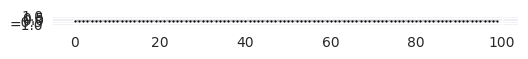

In [15]:

sys,InterfaceSites=make_sys(alpha=0.5,L=100)
kwant.plot(sys)
pyplot.show('False')

We see cosine-shaped bands that for low energies match the parabolic bands of the continuum model.  As expected (see previous notebook) the tight-binding approximation breaks down at high energies.

In [16]:
#add  a fictitious lead to the sites defined in the list InterFaceSite 
mount_vlead(sys,InterfaceSites,norb=2)
sys=sys.finalized()


In [18]:
MyList=[]
G_mat=zeros((2,2),float)
X1,X2=[],[]
energy=-1.8#-3.65
for i in range(-1000,1001):
       
       v=i*0.00006
       GreenFunction=kwant.greens_function(sys,energy=energy,args=[v],out_leads=[0], in_leads=[0]).data
      
       X1.append(GreenFunction[1][1].real) 

       X2.append(GreenFunction[0][0].real)

The following function will plot transmission and reflection from lead 0 to lead 1 as a function of Fermi energy.

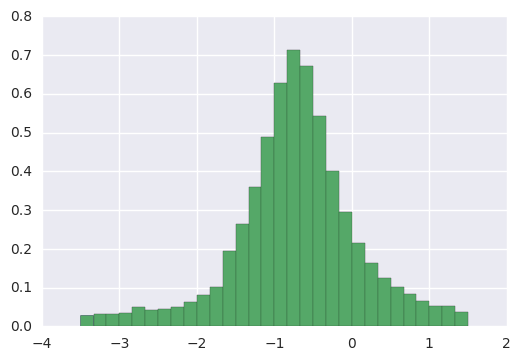

In [19]:
Y0,X0,T0= pyplot.hist(X1,bins=30,range=(-3.5,1.5),normed=True,linewidth=0.11)
Y0,X0,T0= pyplot.hist(X2,bins=30,range=(-3.5,1.5),normed=True,linewidth=0.11)